In [20]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/DataMining')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/My Drive/Colab Notebooks/DataMining/hargasaham-testing.xls'
data = pd.read_excel(file_path)


In [10]:
data = pd.read_excel('/content/hargasaham-testing.xls')

In [11]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-03-19,1166.68,1169.20,1155.33,1159.90,5212410000
1,2010-03-22,1157.25,1167.82,1152.88,1165.81,4261680000
2,2010-03-23,1166.47,1174.72,1163.83,1174.17,4411640000
3,2010-03-24,1172.70,1173.04,1166.01,1167.72,4705750000
4,2010-03-25,1170.03,1180.69,1165.09,1165.73,5668900000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7 non-null      datetime64[ns]
 1   Open    7 non-null      float64       
 2   High    7 non-null      float64       
 3   Low     7 non-null      float64       
 4   Close   7 non-null      float64       
 5   Volume  7 non-null      int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.0 bytes


In [13]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,7,7.000000,7.000000,7.000000,7.000000,7.000000e+00
mean,2010-03-24 00:00:00,1166.917143,1173.464286,1161.761429,1167.591429,4.763483e+09
min,2010-03-19 00:00:00,1157.250000,1167.820000,1152.880000,1159.900000,4.261680e+09
25%,2010-03-22 12:00:00,1166.575000,1171.120000,1158.405000,1165.770000,4.393610e+09
50%,2010-03-24 00:00:00,1167.580000,1173.930000,1163.830000,1166.590000,4.705750e+09
75%,2010-03-25 12:00:00,1168.870000,1174.785000,1165.550000,1170.470000,4.960415e+09
max,2010-03-29 00:00:00,1172.700000,1180.690000,1167.710000,1174.170000,5.668900e+09
std,NaN,4.794253,4.206086,5.614215,4.860972,5.088793e+08


In [24]:
# Menghitung Simple Moving Average (SMA) untuk 7 hari dan 30 hari
data['SMA_7'] = data['Close'].rolling(window=7).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Menghitung Exponential Moving Average (EMA) untuk 7 hari dan 30 hari
data['EMA_7'] = data['Close'].ewm(span=7, adjust=False).mean()
data['EMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()

# Menampilkan hasil
data[['Date', 'Close', 'SMA_7', 'SMA_30', 'EMA_7', 'EMA_30']].head()


,Date,Close,SMA_7,SMA_30,EMA_7,EMA_30
0,2010-03-19,1159.90,NaN,NaN,1159.900000,1159.900000
1,2010-03-22,1165.81,NaN,NaN,1161.377500,1160.281290
2,2010-03-23,1174.17,NaN,NaN,1164.575625,1161.177336
3,2010-03-24,1167.72,NaN,NaN,1165.361719,1161.599443
4,2010-03-25,1165.73,NaN,NaN,1165.453789,1161.865931


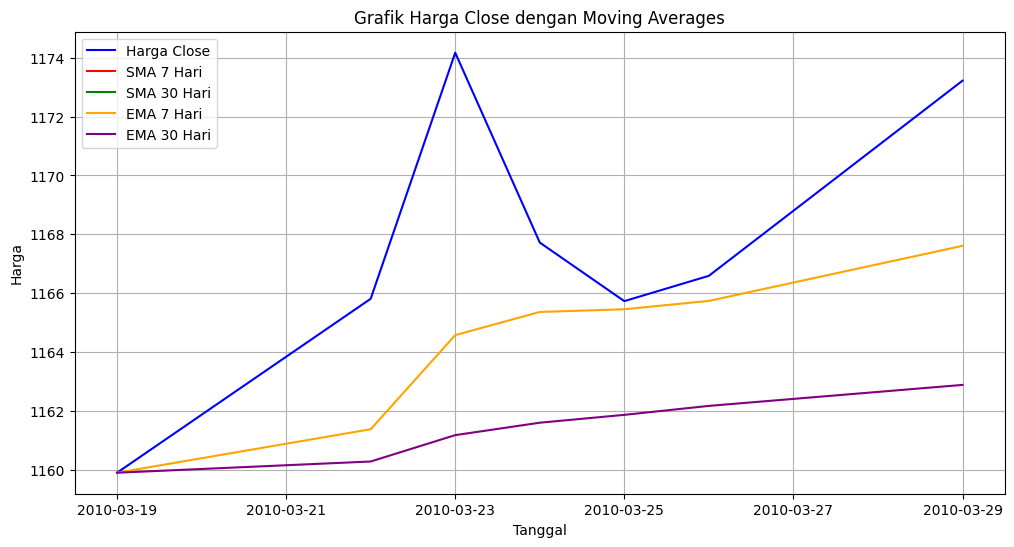

In [25]:
# Membuat plot untuk menampilkan harga Close dan Moving Averages
plt.figure(figsize=(12,6))

# Plot harga Close
plt.plot(data['Date'], data['Close'], label='Harga Close', color='blue')

# Plot SMA 7 dan 30 hari
plt.plot(data['Date'], data['SMA_7'], label='SMA 7 Hari', color='red')
plt.plot(data['Date'], data['SMA_30'], label='SMA 30 Hari', color='green')

# Plot EMA 7 dan 30 hari
plt.plot(data['Date'], data['EMA_7'], label='EMA 7 Hari', color='orange')
plt.plot(data['Date'], data['EMA_30'], label='EMA 30 Hari', color='purple')

# Menambahkan label, judul, dan grid
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title('Grafik Harga Close dengan Moving Averages')
plt.legend()
plt.grid(True)
plt.show()
